In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [7]:
#Importing all required libraries
import numpy as np
np.random.seed(1000)
import pandas as pd

from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

import yfinance as yf

import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as sci

import statsmodels.api as sm

from sklearn.decomposition import KernelPCA

import plotly.express as px
import plotly.graph_objects as go

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

In [8]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray object to generate statistics on
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

## CHAPTER 11

# STATISTICS

#### Python for Finance by Yves Hilpisch

Copyright © 2015 Yves Hilpisch. All rights reserved.

** Normality tests **
A large number of important financial models, like the mean-variance portfolio theory and the capital asset pricing model (CAPM), rest on the assumption thatreturns of securities are normally distributed; therefore, this chapter presents some approaches to test a given time series for normality of returns.

** Portfolio theory **
Modern portfolio theory (MPT) can be considered one of the biggest successes of statistics in finance; starting in the early 1950s with the work of pioneer Harry Markowitz, this theory began to replace people's reliance on judgment and experience with rigorous mathematical and statistical methods when it comes to the investment of money in financial markets. In that sense, it is maybe the first real quantitative approach in finance.

** Principal component analysis **
Principal component analysis (PCA) is quite a popular tool in finance, for example, when it comes to implementing equity investment strategies or analyzing the principal components that explain the movement in interest rates. Its major benefit is
"(noncorrelated,  orthogonal)  components  from  a  potentially  large  set  of  maybe highly correlated time series components; we illustrate the application based on the German DAX index and the 30 stocks contained in that index.

** Bayesian regression **
On a fundamental level, Bayesian statistics introduces the notion of beliefs of agents and the updating of beliefs to statistics; when it comes to linear regression, for ex‐ample, this might take on the form of having a statistical distribution for regression parameters instead of single point estimates (e.g., for the intercept and slope of the regression line). Nowadays, Bayesian methods are rather popular and important in finance, which is why we illustrate some (advanced) applications in this chapter.


### Real Data

In [9]:
tickers_funds =['BIL','IAU','TLH','LQD','HYG','^GSPC','EFA','EEM','VNQ','DX-Y.NYB','EURUSD=X']

data_funds = pd.DataFrame(columns=tickers_funds)

for ticker in tickers_funds:
    data_funds[ticker] = yf.download(ticker, period='10y')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
data_funds = data_funds.dropna()
data=data_funds

In [11]:
tickers_labels = ['Tbill','Gold','iShares US Treas 10y-20y','iShares IG Corp','iShares HY Corp','S&P 500','iShares MSCI EAFE','iShares MSCI EM','Vanguard Real Estate Index',
                 'US Dollar/USDX - Index','EURUSD=X']

In [12]:
data.columns = tickers_labels

In [13]:
data.head()

,Tbill,Gold,iShares US Treas 10y-20y,iShares IG Corp,iShares HY Corp,S&P 500,iShares MSCI EAFE,iShares MSCI EM,Vanguard Real Estate Index,US Dollar/USDX - Index,EURUSD=X
Date,,,,,,,,,,,
2013-04-18,85.274651,26.980000,110.011505,88.068993,56.158016,1541.609985,43.832649,33.104359,48.764984,82.550003,1.303492
2013-04-19,85.293282,27.219999,109.858650,88.199463,56.128273,1555.250000,44.184032,33.588348,49.516457,82.709999,1.305313
2013-04-22,85.293282,27.700001,109.882820,88.228424,56.259033,1562.500000,44.370930,33.749672,49.449371,82.680000,1.305568
2013-04-23,85.293282,27.520000,109.746017,88.344353,56.478893,1578.780029,44.998928,33.910992,49.724464,83.029999,1.306165
2013-04-24,85.293282,27.820000,109.906952,88.380562,56.579914,1578.790039,45.387688,34.112652,49.831833,82.930000,1.299444


In [14]:
data.tail()

,Tbill,Gold,iShares US Treas 10y-20y,iShares IG Corp,iShares HY Corp,S&P 500,iShares MSCI EAFE,iShares MSCI EM,Vanguard Real Estate Index,US Dollar/USDX - Index,EURUSD=X
Date,,,,,,,,,,,
2023-04-12,91.580002,38.189999,115.059998,109.559998,74.910004,4091.949951,72.589996,39.389999,82.720001,101.500000,1.091751
2023-04-13,91.629997,38.700001,114.379997,109.750000,75.419998,4146.220215,73.519997,39.930000,82.470001,101.010002,1.099989
2023-04-14,91.629997,38.009998,113.309998,109.389999,75.279999,4137.640137,73.220001,39.720001,81.190002,101.550003,1.105461
2023-04-17,91.650002,37.860001,112.349998,108.699997,75.080002,4151.319824,73.089996,39.889999,82.879997,102.099998,1.098660
2023-04-18,91.669998,38.049099,112.610001,108.985603,75.028503,4149.430176,73.415001,39.794201,82.470001,101.788002,1.097213


**Figure 11-7** shows therefore the four time series in direct comparison, but normalized to a starting value of 100:

Text(0, 0.5, 'index levels')

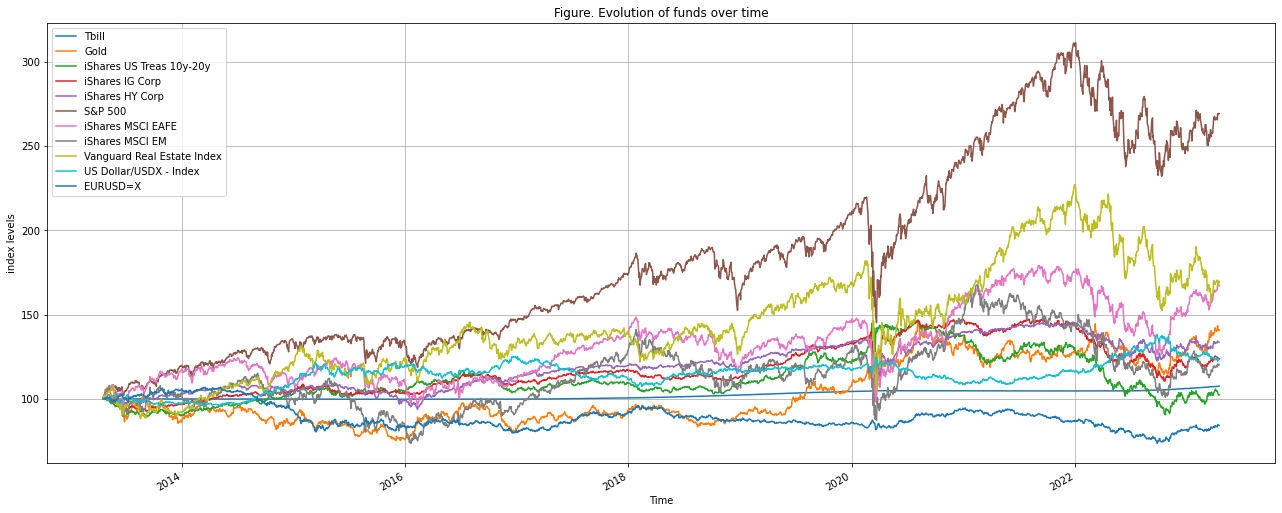

In [15]:
(data / data.iloc[0] * 100).plot(figsize=(22,9))
plt.grid(True)
plt.title('Figure. Evolution of funds over time')
plt.xlabel('Time')
plt.ylabel('index levels')

Calculating the log returns with  pandas is a bit more convenient than with  NumPy, since we can use the  shift method:

In [16]:
log_returns = np.log(data / data.shift(1))
log_returns = np.round(log_returns.dropna(),4)
log_returns.head()

,Tbill,Gold,iShares US Treas 10y-20y,iShares IG Corp,iShares HY Corp,S&P 500,iShares MSCI EAFE,iShares MSCI EM,Vanguard Real Estate Index,US Dollar/USDX - Index,EURUSD=X
Date,,,,,,,,,,,
2013-04-19,0.0002,0.0089,-0.0014,0.0015,-0.0005,0.0088,0.0080,0.0145,0.0153,0.0019,0.0014
2013-04-22,0.0000,0.0175,0.0002,0.0003,0.0023,0.0047,0.0042,0.0048,-0.0014,-0.0004,0.0002
2013-04-23,0.0000,-0.0065,-0.0012,0.0013,0.0039,0.0104,0.0141,0.0048,0.0055,0.0042,0.0005
2013-04-24,0.0000,0.0108,0.0015,0.0004,0.0018,0.0000,0.0086,0.0059,0.0022,-0.0012,-0.0052
2013-04-25,-0.0002,0.0227,-0.0019,-0.0006,0.0027,0.0040,0.0053,0.0089,-0.0034,-0.0023,0.0018


Text(0.5, 0.95, 'Figure. Histogram of respective log returns: ')

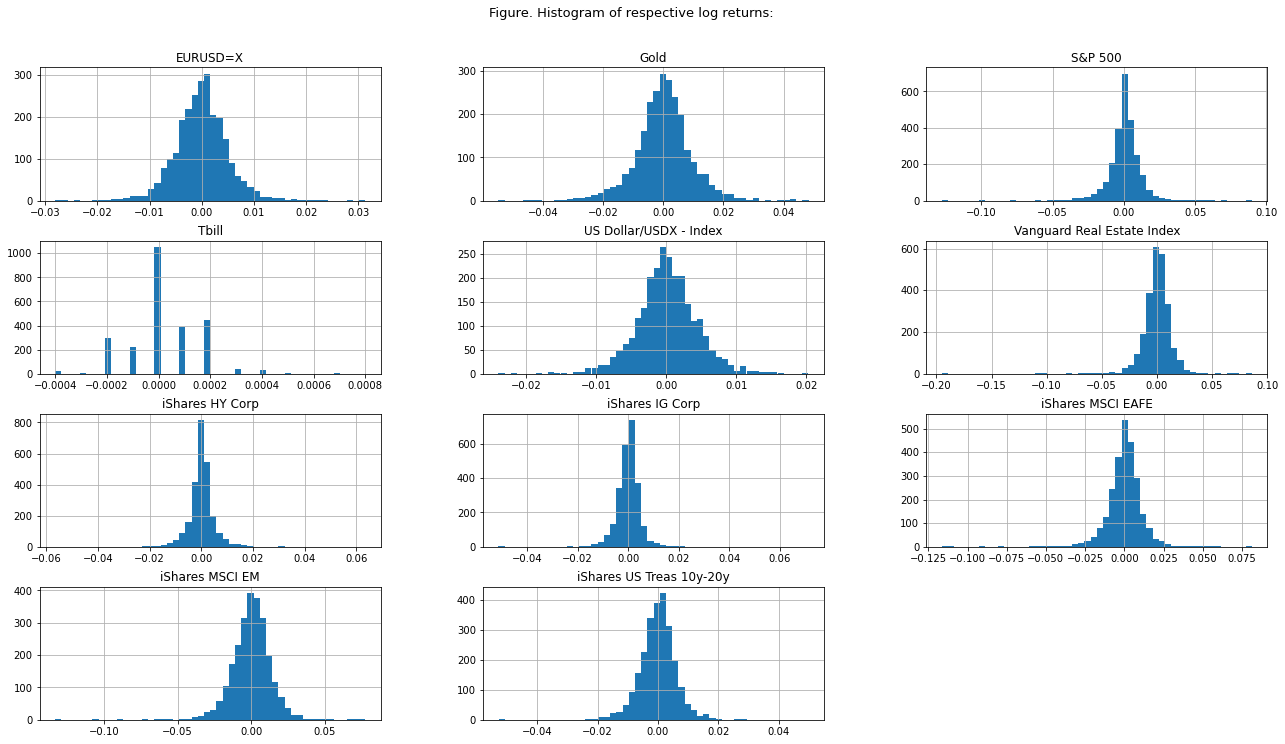

In [17]:
log_returns.hist(bins=50, figsize=(22,12))

plt.suptitle("Figure. Histogram of respective log returns: ", fontsize=13, fontweight=0, color='black', y=.95) #, style='italic'

As a next step, consider the different statistics for the time series data sets. The kurtosis values seem to be especially far from normal for all four data sets:

In [18]:
for sym in tickers_labels:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym])
    print_statistics(log_data)


Results for symbol Tbill
------------------------------
     statistic           value
------------------------------
          size      2511.00000
           min        -0.00040
           max         0.00080
          mean         0.00003
           std         0.00014
          skew         0.12634
      kurtosis         1.03086

Results for symbol Gold
------------------------------
     statistic           value
------------------------------
          size      2511.00000
           min        -0.05480
           max         0.04830
          mean         0.00014
           std         0.00941
          skew        -0.16114
      kurtosis         2.94961

Results for symbol iShares US Treas 10y-20y
------------------------------
     statistic           value
------------------------------
          size      2511.00000
           min        -0.05280
           max         0.04990
          mean         0.00001
           std         0.00639
          skew        -0.05247
     

## Portfolio Optimization

Modern or mean-variance portfolio theory (MPT) is a major cornerstone of financial theory. Based on this theoretical breakthrough the Nobel Prize in Economics was awarded to its inventor, Harry Markowitz, in 1990. Although formulated in the 1950s, it is
still a theory taught to finance students and applied in practice today (often with some minor or major modifications). This section illustrates the fundamental principles of the theory.

Cf. Markowitz, Harry (1952): “Portfolio Selection.” Journal of Finance, Vol. 7, 77-91.

By looking only at mean and variance, we are necessarily assuming that no other statistics are necessary to describe the distribution of end-of-period wealth. Unless investors have a special type of utility function (quadratic utility function), it is necessary to assume that returns have a normal distribution, which can be completely described by mean and
variance.

The basic idea of MPT is diversification to achieve a minimal portfolio risk or maximal portfolio returns given a certain level of risk.

### The Data

In [19]:
print(tickers_labels)
noa = len(tickers_labels)
noa

['Tbill', 'Gold', 'iShares US Treas 10y-20y', 'iShares IG Corp', 'iShares HY Corp', 'S&P 500', 'iShares MSCI EAFE', 'iShares MSCI EM', 'Vanguard Real Estate Index', 'US Dollar/USDX - Index', 'EURUSD=X']


11

Mean-variance refers to the mean and variance of the (log) returns of the different securities, which are calculated as follows. 

Over the period of the time series data, we see significant differences in the annualized performance. We use a factor of 252 trading days to annualize the daily returns.

In [20]:
rets = np.log(data / data.shift(1))
print(rets.mean() * 252*100)

Tbill                         0.725771
Gold                          3.450138
iShares US Treas 10y-20y      0.234293
iShares IG Corp               2.138591
iShares HY Corp               2.907370
S&P 500                       9.936926
iShares MSCI EAFE             5.175979
iShares MSCI EM               1.847159
Vanguard Real Estate Index    5.273053
US Dollar/USDX - Index        2.102389
EURUSD=X                     -1.728910
dtype: float64


The covariance matrix for the assets to be invested in is the central piece of the whole portfolio selection process. pandas has a built-in method to generate the covariance
matrix.

In [21]:
sigma = rets.cov() * 252
print(sigma)

                               Tbill      Gold  iShares US Treas 10y-20y  \
Tbill                       0.000006  0.000011                  0.000007   
Gold                        0.000011  0.022293                  0.004928   
iShares US Treas 10y-20y    0.000007  0.004928                  0.010308   
iShares IG Corp             0.000003  0.004005                  0.005526   
iShares HY Corp            -0.000003  0.001490                 -0.000176   
S&P 500                    -0.000005  0.000563                 -0.004466   
iShares MSCI EAFE           0.000003  0.002494                 -0.003844   
iShares MSCI EM             0.000008  0.004232                 -0.003603   
Vanguard Real Estate Index -0.000010  0.003589                 -0.000701   
US Dollar/USDX - Index     -0.000006 -0.004686                 -0.001418   
EURUSD=X                   -0.000004  0.000221                 -0.000040   

                            iShares IG Corp  iShares HY Corp   S&P 500  \
Tbill        

### The Basic Theory

“In what follows, we assume that an investor is not allowed to set up short positions in a security. Only long positions are allowed, which means that 100% of the investor’s wealth has to be divided among the available assets in such a way that all positions are long (positive) and that the positions add up to 100%. Given the five securities, you could for example invest equal amounts into every security (i.e., 20% of your wealth in each). The following code generates five random numbers between 0 and 1 and then normalizes the values such that the sum of all values equals 1.


In [22]:
weights = np.random.random(noa)
weights /= np.sum(weights)
print(weights)

[0.13056809 0.02297503 0.18983874 0.09632775 0.17429491 0.04241786
 0.00813259 0.07934784 0.046573   0.16815519 0.041369  ]


In [23]:
# Expected portfolio return
print('-'*50)
print('Expected portfolio return = ' + format(np.sum(rets.mean()*weights)*252, '.5f'))
print(' ')
# Expected Portfolio variance
print('Expected portfolio variance = ' + format(np.dot(weights.T, np.dot(rets.cov() * 252, weights)), '.5f'))
print(' ')
# Expected portfolio standard deviation/volatility
print('Expected portfolio sd = ' + format(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))), '.5f'))
print('-'*50)

--------------------------------------------------
Expected portfolio return = 0.02069
 
Expected portfolio variance = 0.00251
 
Expected portfolio sd = 0.05011
--------------------------------------------------


This mainly completes the tool set for mean-variance portfolio selection. Of paramount interest to investors is what risk-return profiles are possible for a given set of securities,
and their statistical characteristics. To this end, we implement a Monte Carlo simulation (cf. Chapter 10) to generate random portfolio weight vectors on a larger scale. For every
simulated allocation, we record the resulting expected portfolio return and variance.

In [24]:
prets = []
pvols = []

for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

In [25]:
print(tickers_labels)
w = np.array([0.00, 0.00, 0.00, 0.00, 0.00, 0.34, 0.33, 0.33, 0.00, 0.00, 0.00])
w1 = np.array([0.00, 0.00, 0.34, 0.33, 0.33, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00])
print(np.sum(w))
print(np.sum(w1))

ms_prets = np.sum(rets.mean() * w) * 252
ms_prets1 = np.sum(rets.mean() * w1) * 252

ms_vols = np.sqrt(np.dot(w.T, np.dot(rets.cov() * 252, w)))
ms_vols1 = np.sqrt(np.dot(w1.T, np.dot(rets.cov() * 252, w1)))


['Tbill', 'Gold', 'iShares US Treas 10y-20y', 'iShares IG Corp', 'iShares HY Corp', 'S&P 500', 'iShares MSCI EAFE', 'iShares MSCI EM', 'Vanguard Real Estate Index', 'US Dollar/USDX - Index', 'EURUSD=X']
1.0
1.0


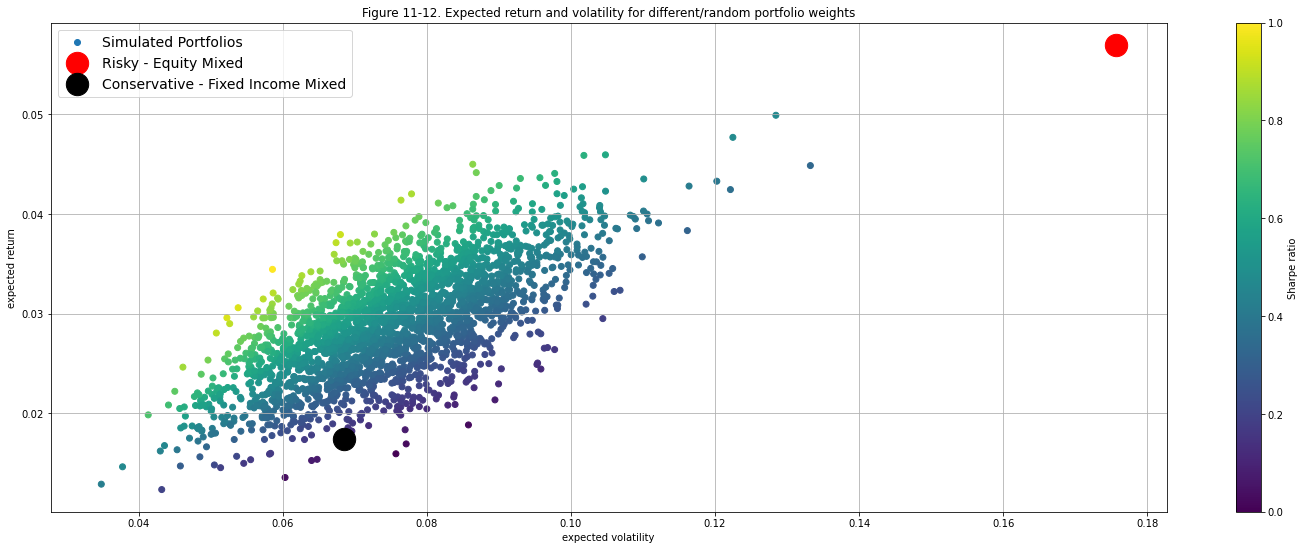

In [26]:
plt.figure(figsize=(25,9))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', label='Simulated Portfolios')
plt.scatter(ms_vols, ms_prets, c='red', s=500, marker='o',label='Risky - Equity Mixed')
plt.scatter(ms_vols1, ms_prets1, c='black', s=500, marker='o',label='Conservative - Fixed Income Mixed')
plt.grid(True)
plt.title('Figure 11-12. Expected return and volatility for different/random portfolio weights')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=14)


In [27]:
prets.shape

(2500,)

It is clear by inspection of Figure 11-12 that not all weight distributions perform well when measured in terms of mean and variance. For example, for a fixed risk level of,
say, 6%, there are multiple portfolios that all show different returns. As an investor one is generally interested in the maximum return given a fixed risk level or the minimum.


## Rolling Window moments

In [28]:
s = 30
rets_rw_mean = np.round(rets.rolling(s).mean() * 252,4)
rets_rw_mean.dropna(inplace=True)
#--
rets_rw_std = np.round(rets.rolling(s).std() * np.sqrt(252),4)
rets_rw_std.dropna(inplace=True)
#len(rets_rw_std)

rets_rw_sr = rets_rw_mean.div(rets_rw_std)

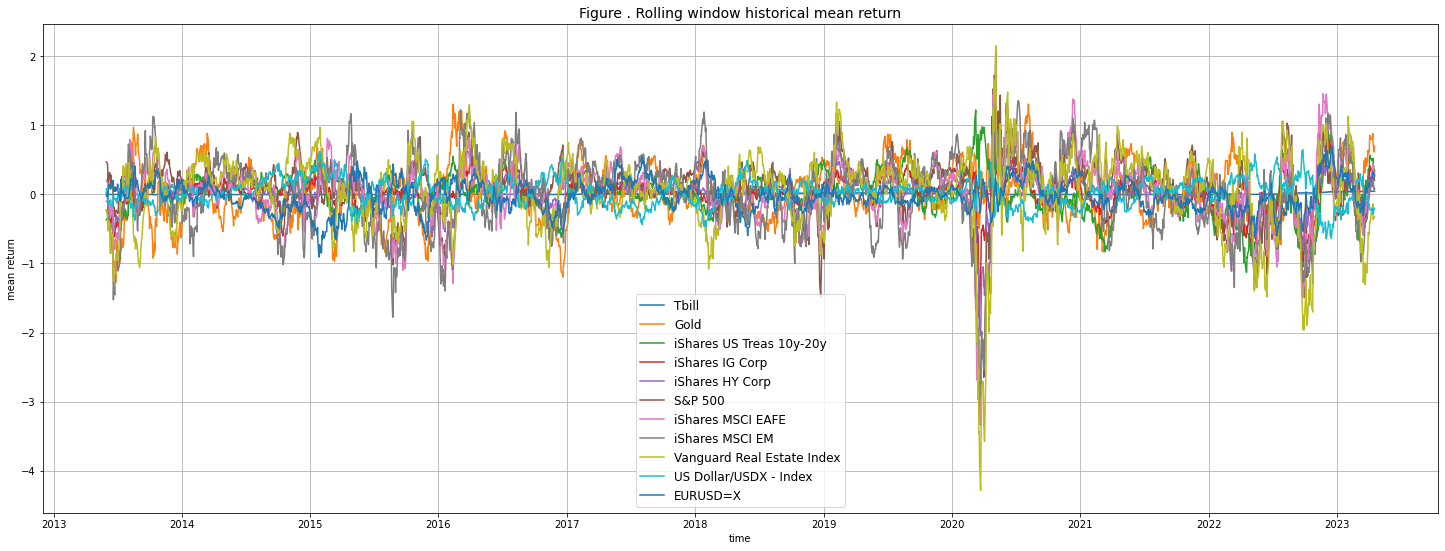

In [29]:
plt.figure(figsize=(25,9))
plt.plot(rets_rw_mean)
plt.grid(True)
plt.title('Figure . Rolling window historical mean return',fontsize=14)
plt.xlabel('time')
plt.ylabel('mean return')
plt.legend(tickers_labels,fontsize=12)

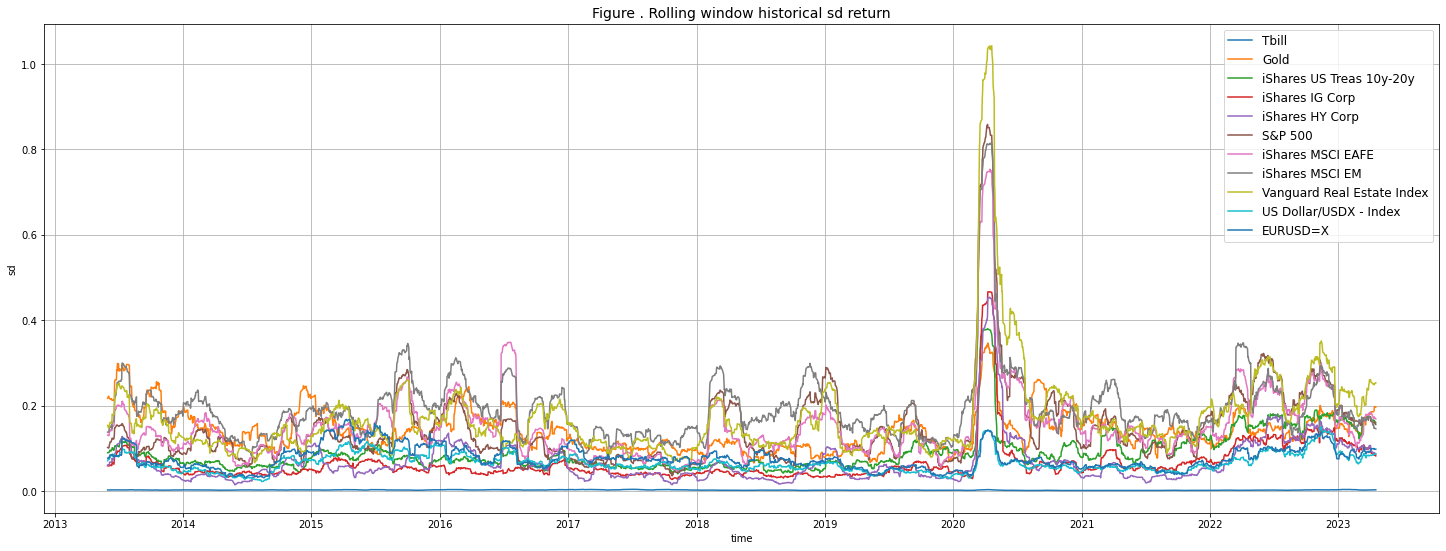

In [30]:
plt.figure(figsize=(25,9))
plt.plot(rets_rw_std)
plt.grid(True)
plt.title('Figure . Rolling window historical sd return',fontsize=14)
plt.xlabel('time')
plt.ylabel('sd')
plt.legend(tickers_labels,fontsize=12)

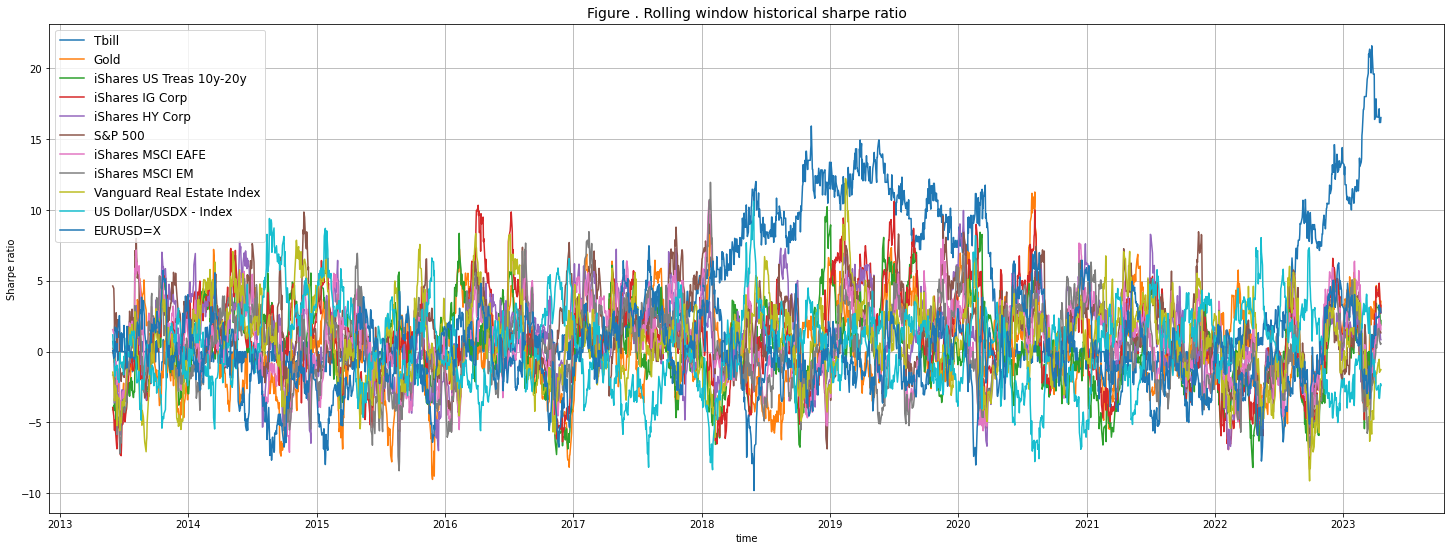

In [31]:
plt.figure(figsize=(25,9))
plt.plot(rets_rw_sr)
plt.grid(True)
plt.title('Figure . Rolling window historical sharpe ratio',fontsize=14)
plt.xlabel('time')
plt.ylabel('Sharpe ratio')
plt.legend(tickers_labels,fontsize=12)

## Portfolio Optimizations

To make our lives a bit easier, first we have a convenience function giving back the major portfolio statistics for an input weights vector/array.

The derivation of the optimal portfolios is a constrained optimization problem for which  we  use  the  function  minimize  from  the  scipy.optimize  sublibrary  (cf. Chapter 9).

In [32]:
def statistics(weights):
    
    ''' Returns portfolio statistics.
            Parameters
             ==========
             weights : array-like weights for different securities in portfolio Returns
             =======
             pret : float expected portfolio return 
             pvol : float expected portfolio volatility
             pret / pvol : float
            Sharpe ratio for rf=0
    '''
    
    weights = np.array(weights) 
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    
    return np.array([pret, pvol, pret / pvol])

The minimization function minimize is quite general and allows for (in)equality constraints and bounds for the parameters. Let us start with the maximization of the Sharpe ratio. Formally, we minimize the negative value of the Sharpe ratio:

In [33]:
def min_func_sharpe(weights):    
    return -statistics(weights)[2]

The constraint is that all parameters (weights) add up to 1. This can be formulated as follows using the conventions of the  minimize function

In [34]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

We also bound the parameter values (weights) to be within 0 and 1. These values are provided to the minimization function as a tuple of tuples in this case:

In [35]:
bnds = tuple((0, 1) for x in range(noa))

The only input that is missing for a call of the optimization function is a starting parameter list (initial guesses for the weights). We simply use an equal distribution.

Calling the function returns not only optimal parameter values, but much more. We store the results in an object we call opts.

In [36]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',bounds=bnds, constraints=cons)

Wall time: 769 ms


In [37]:
 print(opts)

     fun: -3.088822412547759
     jac: array([ 3.63588333e-05, -7.55316019e-03, -1.66630745e-03,  2.38013268e-03,
        2.15641907e+00, -1.75642371e-02,  9.24641714e+00,  3.02237417e+01,
        1.24682307e+01,  3.99950147e-03,  3.99010304e+00])
 message: 'Optimization terminated successfully'
    nfev: 415
     nit: 32
    njev: 32
  status: 0
 success: True
       x: array([9.86065868e-01, 2.12152542e-03, 4.62496223e-04, 6.52460675e-04,
       0.00000000e+00, 2.90843943e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.78920984e-03, 0.00000000e+00])


Our main interest lies in getting the optimal portfolio composition. To this end, we access the results object by providing the key of interest—i.e., x in our case. The optimization yields a portfolio that only consists of three out of the five assets:

In [38]:
print(tickers_labels)
opts['x'].round(3)

['Tbill', 'Gold', 'iShares US Treas 10y-20y', 'iShares IG Corp', 'iShares HY Corp', 'S&P 500', 'iShares MSCI EAFE', 'iShares MSCI EM', 'Vanguard Real Estate Index', 'US Dollar/USDX - Index', 'EURUSD=X']


array([0.986, 0.002, 0.   , 0.001, 0.   , 0.003, 0.   , 0.   , 0.   ,
       0.008, 0.   ])

Using the portfolio weights from the optimization, the following statistics emerge:

In [39]:
statistics(opts['x']).round(3)

array([8.000e-03, 2.000e-03, 3.089e+00])

Next, let us minimize the variance of the portfolio. This is the same as minimizing the volatility, but we will define a function to minimize the variance:

In [40]:
def min_func_variance(weights):    
    return statistics(weights)[1] ** 2

In [41]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,],method='SLSQP', bounds=bnds,constraints=cons)

In [42]:
print(optv)

     fun: 6.158789884979035e-06
     jac: array([ 1.16041039e-05,  1.37571517e-05, -1.03866224e-05,  5.24021210e-05,
        1.14789966e-04,  2.77214029e-04,  3.06310366e-04,  3.27238376e-04,
        2.38966099e-04, -3.86567240e-06,  9.90766324e-05])
 message: 'Optimization terminated successfully'
    nfev: 457
     nit: 38
    njev: 38
  status: 0
 success: True
       x: array([9.86744769e-01, 8.67361738e-19, 3.69578564e-03, 0.00000000e+00,
       8.67361738e-19, 4.33680869e-19, 3.21647545e-03, 8.67361738e-19,
       0.00000000e+00, 4.17825200e-03, 2.16471758e-03])


In [43]:
print(tickers_labels)
optv['x'].round(3)

['Tbill', 'Gold', 'iShares US Treas 10y-20y', 'iShares IG Corp', 'iShares HY Corp', 'S&P 500', 'iShares MSCI EAFE', 'iShares MSCI EM', 'Vanguard Real Estate Index', 'US Dollar/USDX - Index', 'EURUSD=X']


array([0.987, 0.   , 0.004, 0.   , 0.   , 0.   , 0.003, 0.   , 0.   ,
       0.004, 0.002])

## Efficient Frontier

The derivation of all optimal portfolios—i.e., all portfolios with minimum volatility for a given target return level (or all portfolios with maximum return for a given risk level)
—is similar to the previous optimizations. The only difference is that we have to iterate over multiple starting conditions. The approach we take is that we fix a target return
level and derive for each such level those portfolio weights that lead to the minimum volatility value. For the optimization, this leads to two conditions: one for the target
return level  tret and one for the sum of the portfolio weights as before. The boundary values for each parameter stay the same.

In [44]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},{'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

For clarity, we define a dedicated function min_func for use in the minimization procedure. It merely returns the volatility value from the  statistics function.

In [45]:
def min_func_port(weights):
    return statistics(weights)[1]

In [46]:
trets = np.linspace(0.0025, 0.105, 100)
tvols = []

ef_we = []

for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}, {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',  bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
    ef_we.append(res['x'].round(3))
       
tvols = np.array(tvols)


In [47]:
ef_w = pd.DataFrame(ef_we,columns=tickers_labels)

In [48]:
tvols

array([0.01565599, 0.01231786, 0.00901904, 0.00582726, 0.00309335,
       0.00248556, 0.00320031, 0.0043922 , 0.00577336, 0.00723607,
       0.0087396 , 0.0102657 , 0.01180597, 0.01335583, 0.014911  ,
       0.01647148, 0.01803479, 0.01960133, 0.02116901, 0.02273874,
       0.02430952, 0.02588149, 0.02745425, 0.02902772, 0.03060181,
       0.03217645, 0.03375154, 0.0353281 , 0.03690284, 0.03848014,
       0.0400554 , 0.04163441, 0.04320917, 0.04478596, 0.04636338,
       0.04794061, 0.04951809, 0.05109508, 0.05267278, 0.05425105,
       0.05583869, 0.05747345, 0.05915366, 0.06087523, 0.06263641,
       0.06443174, 0.06627169, 0.06815912, 0.07009009, 0.0720611 ,
       0.0740699 , 0.07611076, 0.07818375, 0.08028563, 0.08241415,
       0.0845673 , 0.08674342, 0.08894038, 0.09115694, 0.09339179,
       0.09564355, 0.09791108, 0.10019329, 0.1024892 , 0.10479791,
       0.1071186 , 0.1094505 , 0.11179292, 0.1141452 , 0.11650674,
       0.11887701, 0.12125547, 0.12364167, 0.12603515, 0.12843

In [49]:
ef_w.tail(5)

,Tbill,Gold,iShares US Treas 10y-20y,iShares IG Corp,iShares HY Corp,S&P 500,iShares MSCI EAFE,iShares MSCI EM,Vanguard Real Estate Index,US Dollar/USDX - Index,EURUSD=X
95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Figure 11-13 shows the optimization results. Crosses indicate the optimal portfolios given a certain target return; the dots are, as before, the random portfolios. In addition,
the figure shows two larger stars: one for the minimum volatility/variance portfolio (the leftmost portfolio) and one for the portfolio with the maximum Sharpe ratio.

The efficient frontier is comprised of all optimal portfolios with a higher return than the absolute minimum variance portfolio. These portfolios dominate all other portfolios in
terms of expected returns given a certain risk level.

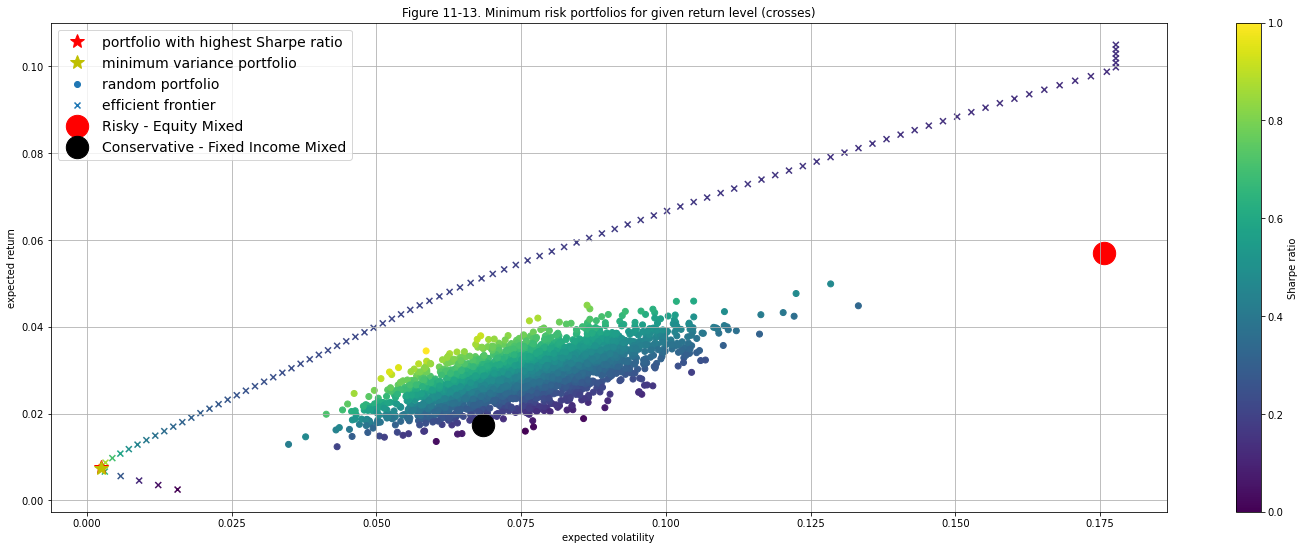

In [50]:
plt.figure(figsize=(25,9))

# random portfolio composition
plt.scatter(pvols, prets, c=prets / pvols, marker='o', label='random portfolio')

# efficient frontier
plt.scatter(tvols, trets, c=trets / tvols, marker='x', label='efficient frontier')

# portfolio with highest Sharpe ratio
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'r*', markersize=15.0, label='portfolio with highest Sharpe ratio')

# minimum variance portfolio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],'y*', markersize=15.0, label='minimum variance portfolio')

plt.scatter(ms_vols, ms_prets, c='red', s=500, marker='o',label='Risky - Equity Mixed')
plt.scatter(ms_vols1, ms_prets1, c='black', s=500, marker='o',label='Conservative - Fixed Income Mixed')
                     
plt.grid(True)
plt.title('Figure 11-13. Minimum risk portfolios for given return level (crosses)')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=14)

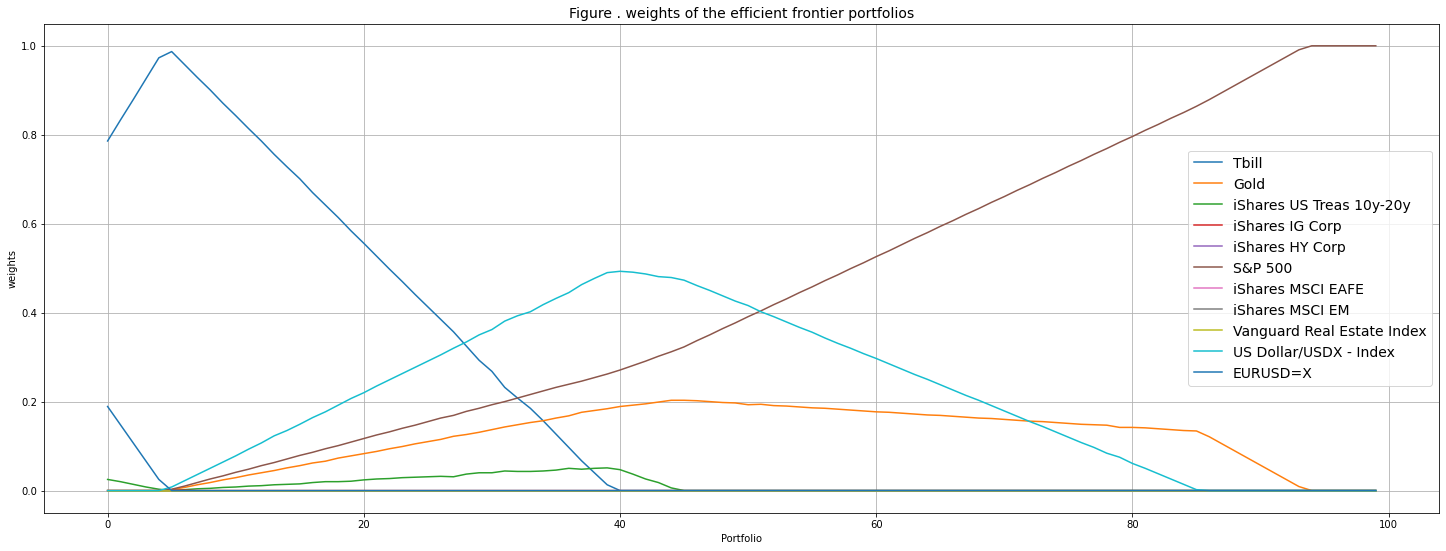

In [51]:
plt.figure(figsize=(25,9))
plt.plot(ef_w)
plt.grid(True)
plt.title('Figure . weights of the efficient frontier portfolios',fontsize=14)
plt.xlabel('Portfolio')
plt.ylabel('weights')
plt.legend(tickers_labels,fontsize=14)

## Capital Market Line


In addition to risky securities like stocks or commodities (such as gold), there is in general one universal, riskless investment opportunity available: cash or cash accounts.
In an idealized world, money held in a cash account with a large bank can be considered riskless (e.g., through public deposit insurance schemes). The downside is that such a
riskless investment generally yields only a small return, sometimes close to zero.

However, taking into account such a riskless asset enhances the efficient investment opportunity set for investors considerably. The basic idea is that investors first determine
an efficient portfolio of risky assets and then add the riskless asset to the mix. By adjusting the proportion of the investor’s wealth to be invested in the riskless asset it is
possible to achieve any risk-return profile that lies on the straight line (in the risk-return space) between the riskless asset and the efficient portfolio.

For the spline interpolation, we only use the portfolios from the efficient frontier. The following code selects exactly these portfolios from our previously used sets  tvols and trets.

In [68]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

numpy.float64

The new  ndarray objects  evols and  erets are used for the interpolation.

In [66]:
tck = sci.splrep(evols, erets)

ValueError: Error on input data

Via this numerical route we end up being able to define a continuously differentiable function  *f(x)* for the efficient frontier and the respective first derivative function  *df(x)*:

In [ ]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)

def df(x):    
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)    

def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [ ]:
opt = sco.fsolve(equations, [0.0025, 0.025, 0.105])

In [ ]:
opt

In [ ]:
np.round(equations(opt), 6)

Figure 11-14 presents the results graphically: the star represents the optimal portfolio from the efficient frontier where the tangent line passes through the riskless asset point 
*(0,r f  = 0.01)*. The optimal portfolio has an expected volatility of *20.5%* and an expected return of *17.6%*. The plot is generated with the following code.

In [ ]:
plt.figure(figsize=(25,9))

# random portfolio composition
plt.scatter(pvols, prets, c=(prets - 0.0001) / pvols, marker='o',label='Random portfolios') 

# efficient frontier
plt.plot(evols, erets, 'g', lw=4.0,label='Efficient frontier')

# capital market line
cx = np.linspace(0.0, 0.105)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5, label='Capital market line')

plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0, label='Tangency portfolio')
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

plt.legend(fontsize=14)

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])}, {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',bounds=bnds, constraints=cons)

In [ ]:
res['x'].round(3)